Accuracy: 0.6


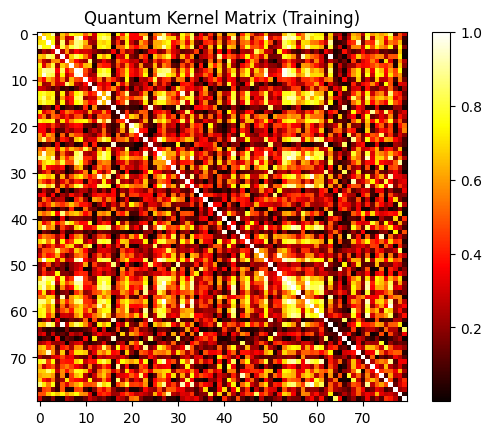

In [4]:
#-------------------------------------------------------------------------
# Quantum Kernel in SVM 
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
# Implementation of the Quantum Kernel Method for SVM
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work is required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# Import the Scikit Learn Machine Learning libraries
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import the Qiskit Libraries
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
#-------------------------------------------------------------------------

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0)
y = 2 * y - 1  # Convert to {-1, 1}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define a quantum feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)

# Quantum kernel
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=Aer.get_backend('statevector_simulator'))

# Compute kernel matrix
kernel_matrix_train = quantum_kernel.evaluate(X_train)
kernel_matrix_test  = quantum_kernel.evaluate(X_test, X_train)

# Train classical SVM with quantum kernel
svm = SVC(kernel='precomputed')
svm.fit(kernel_matrix_train, y_train)

# Predict and evaluate
y_pred = svm.predict(kernel_matrix_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualization of Quantum Kernels
plt.imshow(kernel_matrix_train, cmap='hot', interpolation='nearest')
plt.title("Quantum Kernel Matrix (Training)")
plt.colorbar()
plt.show()